In [1]:
import pandas as pd

df = pd.read_csv('/content/student_personas_named.csv')
display(df.head())
display(df.info())

,student_id,name,class,comprehension,attention,focus,retention,assessment_score,engagement_time,persona,persona_name
0,S0001,Mason Adams,2,73.86,80.15,87.15,73.09,77.43,99,0,🌟 Highly Engaged High Performer
1,S0002,Thomas Hood,1,73.92,82.01,73.97,73.95,77.17,58,2,📈 Consistent Learner
2,S0003,Matthew Diaz,5,48.25,44.65,55.26,45.49,41.49,64,1,💤 Low Engagement Risk
3,S0004,Laura Carpenter,4,68.28,56.34,63.39,68.63,58.39,63,3,📚 Developing Performer
4,S0005,Justin Mccoy,4,61.66,59.18,78.81,63.89,60.48,77,3,📚 Developing Performer


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        1000 non-null   object 
 1   name              1000 non-null   object 
 2   class             1000 non-null   int64  
 3   comprehension     1000 non-null   float64
 4   attention         1000 non-null   float64
 5   focus             1000 non-null   float64
 6   retention         1000 non-null   float64
 7   assessment_score  1000 non-null   float64
 8   engagement_time   1000 non-null   int64  
 9   persona           1000 non-null   int64  
 10  persona_name      1000 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB


None

In [2]:
features = ['comprehension', 'attention', 'focus', 'retention', 'engagement_time']
df_features = df[features]
display(df_features.head())

,comprehension,attention,focus,retention,engagement_time
0,73.86,80.15,87.15,73.09,99
1,73.92,82.01,73.97,73.95,58
2,48.25,44.65,55.26,45.49,64
3,68.28,56.34,63.39,68.63,63
4,61.66,59.18,78.81,63.89,77


## Data preprocessing

### Subtask:
Scale the selected features to ensure that all features contribute equally to the clustering process.


**Reasoning**:
Scale the selected features using StandardScaler to prepare them for clustering.



In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_features = pd.DataFrame(df_scaled, columns=df_features.columns)
display(df_features.head())

,comprehension,attention,focus,retention,engagement_time
0,0.311930,0.801028,1.377638,0.292389,1.963324
1,0.316495,0.949299,0.339234,0.360048,-0.765271
2,-1.636537,-2.028858,-1.134859,-1.878971,-0.365965
3,-0.112609,-1.096988,-0.494326,-0.058490,-0.432516
4,-0.616274,-0.870597,0.720560,-0.431397,0.499200


In [4]:
from sklearn.cluster import KMeans


KMeans is chosen as the clustering algorithm.


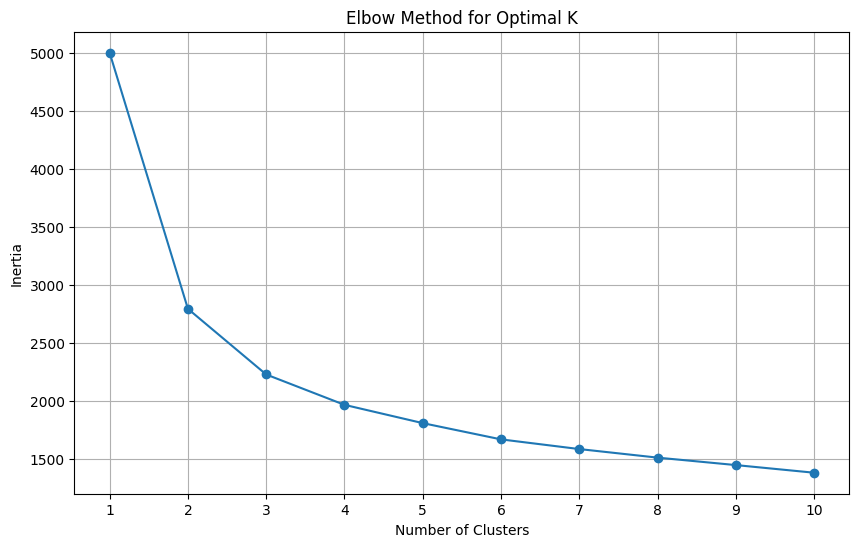

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(df_features)
df['cluster_label'] = kmeans.labels_
display(df.head())

,student_id,name,class,comprehension,attention,focus,retention,assessment_score,engagement_time,persona,persona_name,cluster_label
0,S0001,Mason Adams,2,73.86,80.15,87.15,73.09,77.43,99,0,🌟 Highly Engaged High Performer,1
1,S0002,Thomas Hood,1,73.92,82.01,73.97,73.95,77.17,58,2,📈 Consistent Learner,0
2,S0003,Matthew Diaz,5,48.25,44.65,55.26,45.49,41.49,64,1,💤 Low Engagement Risk,2
3,S0004,Laura Carpenter,4,68.28,56.34,63.39,68.63,58.39,63,3,📚 Developing Performer,3
4,S0005,Justin Mccoy,4,61.66,59.18,78.81,63.89,60.48,77,3,📚 Developing Performer,3


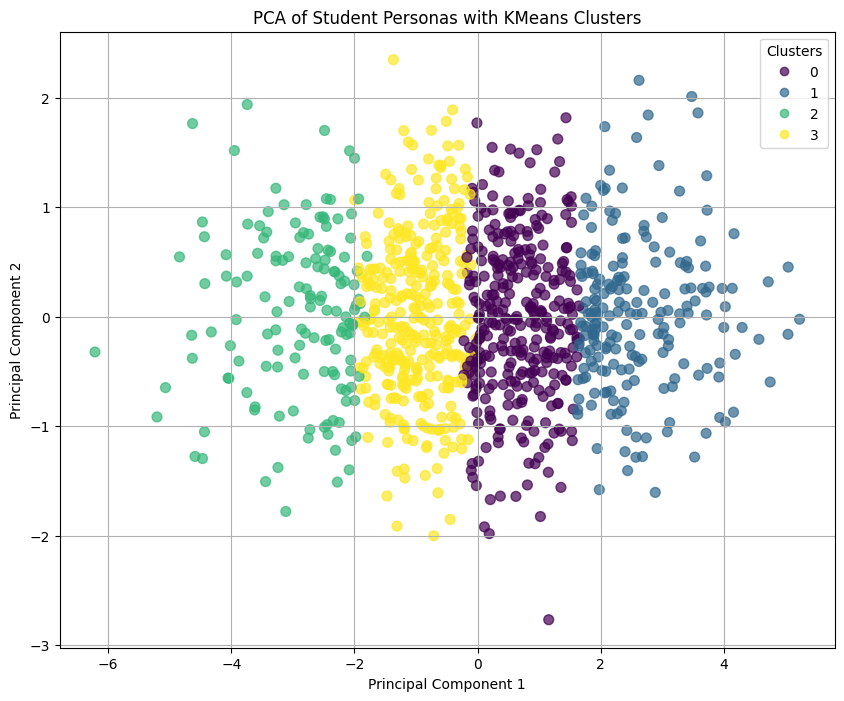

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_features)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster_label'], cmap='viridis', s=50, alpha=0.7)
plt.title('PCA of Student Personas with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

legend = plt.legend(*scatter.legend_elements(), title="Clusters")

plt.grid(True)
plt.show()

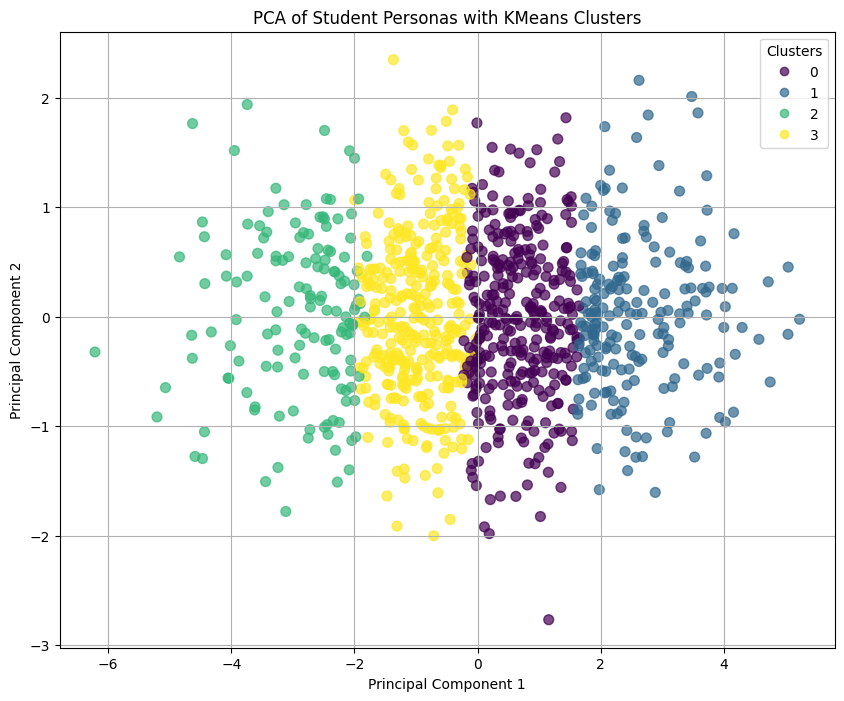

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_features)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster_label'], cmap='viridis', s=50, alpha=0.7)
plt.title('PCA of Student Personas with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend(*scatter.legend_elements(), title="Clusters")

plt.grid(True)
plt.show()

In [9]:
cluster_characteristics = df.groupby('cluster_label')[features].mean()
display(cluster_characteristics)

,comprehension,attention,focus,retention,engagement_time
cluster_label,,,,,
0,74.472593,73.978704,73.455401,72.544938,73.580247
1,84.422985,85.089403,84.318159,83.965174,87.621891
2,53.362042,53.719859,51.303732,52.945845,51.330986
3,63.316967,64.267477,64.959850,64.485255,62.336336


In [19]:
import joblib
import os

# Define the filename for the model
model_filename = 'kmeans_model.joblib'

# Save the trained KMeans model
joblib.dump(kmeans, model_filename)

print(f"KMeans model saved to {model_filename}")

# Load the saved model
loaded_kmeans_model = joblib.load(model_filename)
print(f"KMeans model loaded from {model_filename}")

# Predict cluster labels on the scaled features (as an example of new data)
predicted_clusters = loaded_kmeans_model.predict(df_features)

# Display the predicted clusters
print("\nPredicted cluster labels for the first 10 samples:")
print(predicted_clusters[:10])

# Verify that the predictions are the same as the original cluster labels
print("\nOriginal cluster labels for the first 10 samples:")
print(df['cluster_label'].head(10).values)

KMeans model saved to kmeans_model.joblib
KMeans model loaded from kmeans_model.joblib

Predicted cluster labels for the first 10 samples:
[1 0 2 3 3 2 3 2 3 3]

Original cluster labels for the first 10 samples:
[1 0 2 3 3 2 3 2 3 3]


In [16]:
# Create a dictionary mapping cluster labels to persona names
persona_names = dict(zip(df['cluster_label'], df['persona_name']))

# Display the dictionary
print("\nDictionary of Cluster Labels to Persona Names:")
print(persona_names)


Dictionary of Cluster Labels to Persona Names:
{1: '🌟 Highly Engaged High Performer', 0: '📈 Consistent Learner', 2: '💤 Low Engagement Risk', 3: '📚 Developing Performer'}


## Input Types for Clustering

The input for the KMeans clustering algorithm are the scaled features selected in the data preprocessing step. These features are:

*   `comprehension`: Student's comprehension score.
*   `attention`: Student's attention score.
*   `focus`: Student's focus score.
*   `retention`: Student's retention score.
*   `engagement_time`: Student's engagement time.

These numerical features were scaled using `StandardScaler` to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the clustering process, regardless of its original scale.

In [18]:
# Demonstrate batch prediction

# Let's use the first 10 rows of the scaled features as an example batch
batch_data = df_features.head(10)

# Perform batch prediction
batch_predictions = loaded_kmeans_model.predict(batch_data)

print("\nBatch Predictions:")
print(batch_predictions)



Batch Predictions:
[1 0 2 3 3 2 3 2 3 3]
